<코스타리카 가구 빈곤 수준 예측>
> 목표 : 사호 복지 지원이 가장 필요한 가구 식별



<컬럼 설명>

> Target: 소득 수준 그룹 나타내는 변수
- 1=극심한빈곤
- 2=보통빈곤
- 3= 취약가구
- 4=비취약가구

> idhogar: 각 가구에 대한 고유 식별자

> parentesco1:세대주여부

<주의점>
>  가장만 점수를 매기는 데 사용된다 == 가구 단위로 빈곤을 예측

>  동일한 가구의 개인이 서로 다른 레이블을 갖는 오류는 각 가구의 가장에 대한 레이블을 사용

##### 데이터 로드

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path='./drive/MyDrive/data/'
train_filename='train_Costa_Rican.csv'  

In [ ]:
import pandas as pd
import os
train = pd.read_csv(os.path.join(file_path, train_filename))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [ ]:
train.head(2)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.0,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.0,64.0,144.0,4489,4


In [ ]:
train['Target'].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [ ]:
a = train.groupby(['idhogar','parentesco1', 'Target'])['Id'].count().reset_index() # groupby 할 때 Target도 같이 넣어야지 target count 하지 않음음
a

,idhogar,parentesco1,Target,Id
0,001ff74ca,0,4,1
1,001ff74ca,1,4,1
2,003123ec2,0,2,3
3,003123ec2,1,2,1
4,004616164,0,2,1
...,...,...,...,...
5625,ffae4a097,1,4,1
5626,ffe90d46f,0,1,3
5627,ffe90d46f,1,1,1
5628,fff7d6be1,0,4,3


In [ ]:
_parentesco1 = train[train['parentesco1']==1].copy()
_parentesco0 = train[~(train['parentesco1']==1)].copy() # ~ + 1 

In [ ]:
_p1_id = set(_parentesco1.idhogar.values)
len(_p1_id)

2973

In [ ]:
_parentesco0['Target_v2']=_parentesco0['idhogar'].map(lambda x : True if x in _p1_id else False)
_parentesco0['Target_v2'].value_counts()

True     6561
False      23
Name: Target_v2, dtype: int64

In [ ]:
_parentesco0 = _parentesco0[_parentesco0['Target_v2']==True]
len(_parentesco0)

6561

In [ ]:
_parentesco1[_parentesco1['idhogar']=='d6c086aa3']['Target'] # map 넣기전에 먼저 실험하면 시간 단축됨됨

9552    2
Name: Target, dtype: int64

In [ ]:
_parentesco0.loc[:,'Target_v2'] = _parentesco0['idhogar'].map(lambda x :  _parentesco1[_parentesco1['idhogar']==x]['Target'].values[0]) #loc['' ]== 컬럼으로 생김김
len(_parentesco0)

6561

In [ ]:
_parentesco0.tail() # map, apply 사용 후에는 head 보다는 tail 하는게 시간 단축축

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,Target_v2
9550,ID_90a399a51,NaN,0,3,0,1,1,0,NaN,0,...,3721,4,0,0,4.0000,1.0000,9.0000,3721,2,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,...,4,25,81,1,1.5625,0.0625,68.0625,4,2,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,...,2500,25,81,1,1.5625,0.0625,68.0625,2500,2,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,...,676,25,81,1,1.5625,0.0625,68.0625,676,2,2
9556,ID_a38c64491,80000.0,0,6,0,1,1,0,NaN,0,...,441,25,81,1,1.5625,0.0625,68.0625,441,2,2


In [ ]:
len(_parentesco0[_parentesco0['Target']!= _parentesco0['Target_v2']])

140

In [ ]:
_parentesco0[_parentesco0['Target']!= _parentesco0['Target_v2']].head(2)# ['idhogar'] 4b6077882

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,Target_v2
283,ID_17d9dcd44,60000.0,0,3,0,1,0,0,NaN,0,...,49,9,0,4,9.0,4.0,25.0,49,2,1
284,ID_e78621924,60000.0,0,3,0,1,0,0,NaN,0,...,4,9,0,4,9.0,4.0,25.0,4,2,1


In [ ]:
_parentesco0.drop('Target', axis=1, inplace=True)
_parentesco0 =_parentesco0.rename(columns={'Target_v2' : 'Target'})
_parentesco0 = _parentesco0[_parentesco1.columns.tolist()]

In [ ]:
train_v2 = pd.concat([_parentesco0, _parentesco1], axis=0)

In [ ]:
train_v2.Target.value_counts()
#train(old버전전)
# 4    5996
# 2    1597
# 3    1209
# 1     755

4    6001
2    1558
3    1201
1     774
Name: Target, dtype: int64

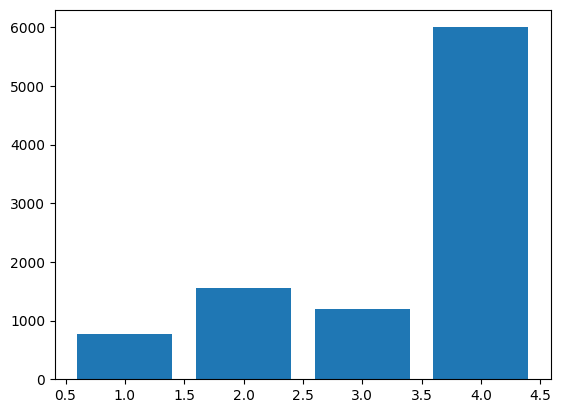

'클래스 수를 고려해서 train,valid 나눠야 함함'

In [ ]:
import matplotlib.pyplot as plt
plt.bar(train_v2.Target.value_counts().index, train_v2.Target.value_counts().values, width=0.8, bottom= None, align='center')
plt.show()
'''클래스 수를 고려해서 train,valid 나눠야 함함'''

### 전처리


In [ ]:
len(train_v2)

9534

In [ ]:
back_train = train_v2.copy()

In [ ]:
train_v2.isna().sum().sort_values(ascending=False)[:10]
#rez_Esc 학교로부터 몇년뒤
#v18q1 가구가 소유한 태블릿 수
#v2a1 월세

rez_esc         7921
v18q1           7319
v2a1            6843
SQBmeaned          5
meaneduc           5
Id                 0
hogar_adul         0
parentesco10       0
parentesco11       0
parentesco12       0
dtype: int64

In [ ]:
train_v2.drop(['rez_esc', 'v18q1', 'v2a1'], axis=1, inplace=True)

In [ ]:
train_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9534 entries, 3 to 9552
Columns: 140 entries, Id to Target
dtypes: float64(5), int64(130), object(5)
memory usage: 10.3+ MB


(array([6.860e+02, 2.671e+03, 3.507e+03, 1.687e+03, 7.640e+02, 1.630e+02,
        3.200e+01, 1.400e+01, 2.000e+00, 3.000e+00]),
 array([ 0. ,  3.7,  7.4, 11.1, 14.8, 18.5, 22.2, 25.9, 29.6, 33.3, 37. ]),
 <BarContainer object of 10 artists>)

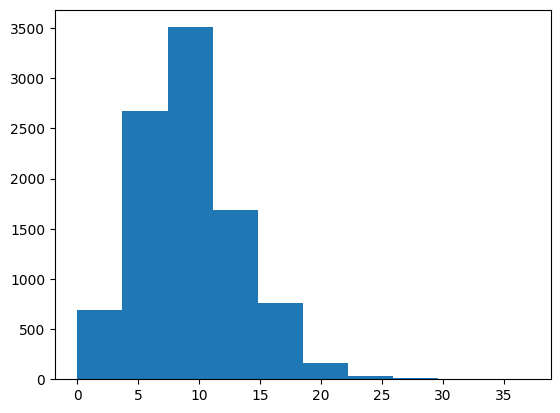

In [ ]:
'''왜 boxplot이 안그려지지'''
# plt.boxplot(train_v2['meaneduc'])
# #plt.title('SQBmeaned')
# plt.show()
plt.hist('meaneduc',data=train_v2)

(array([7.194e+03, 1.939e+03, 2.780e+02, 8.000e+01, 1.900e+01, 7.000e+00,
        7.000e+00, 2.000e+00, 0.000e+00, 3.000e+00]),
 array([   0. ,  136.9,  273.8,  410.7,  547.6,  684.5,  821.4,  958.3,
        1095.2, 1232.1, 1369. ]),
 <BarContainer object of 10 artists>)

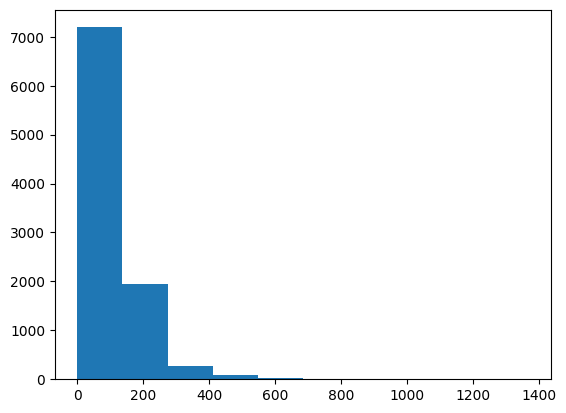

In [ ]:
# plt.boxplot(train_v2['SQBmeaned'])
# #plt.title('SQBmeaned')
# plt.show()
plt.hist('SQBmeaned',data=train_v2)

In [ ]:
m_mean = train_v2.meaneduc.mean()
m_mean
train_v2.meaneduc = train_v2.meaneduc.fillna(m_mean)


In [ ]:
s_mode =  train_v2.SQBmeaned.value_counts().sort_values(ascending=False).index[0] # index[0]임
train_v2.SQBmeaned = train_v2.SQBmeaned.fillna(s_mode)

In [ ]:
corr_df = train_v2.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))
corr_df_t = corr_df['Target']
# corr_df_t[corr_df_t>0.5]
# corr_df_t[corr_df_t<-0.5]

<ipython-input-30-697ec1bf3aed>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = train_v2.corr()


In [ ]:
corr_df_t.sort_values(ascending=False)[:10]

Target         1.00
meaneduc       0.34
escolari       0.31
cielorazo      0.31
SQBescolari    0.30
eviv3          0.30
epared3        0.29
pisomoscer     0.28
SQBmeaned      0.28
etecho3        0.26
Name: Target, dtype: float64

(array([11., 35., 52., 21., 13.,  1.,  0.,  0.,  0.,  1.]),
 array([-0.33 , -0.197, -0.064,  0.069,  0.202,  0.335,  0.468,  0.601,
         0.734,  0.867,  1.   ]),
 <BarContainer object of 10 artists>)

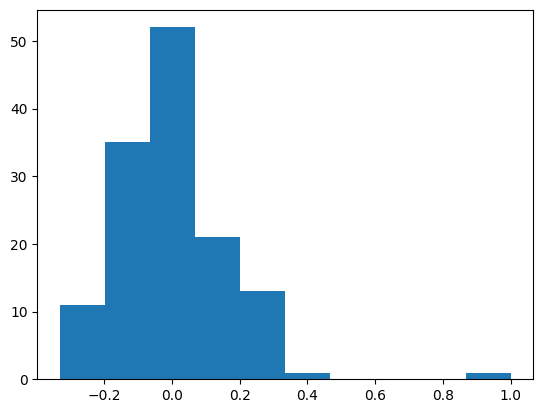

In [ ]:
plt.hist(corr_df_t)

In [ ]:
train_v2.select_dtypes("object")
# dependency 의존도
# edjefe 남성 가장의 교육년수
# edjefa 여성 가장의 학력

,Id,idhogar,dependency,edjefe,edjefa
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no
6,ID_e9e0c1100,2b58d945f,yes,11,no
7,ID_3e04e571e,d6dae86b7,yes,9,no
9,ID_51f52fdd2,d6dae86b7,yes,9,no
...,...,...,...,...,...
9535,ID_18b0a845b,9bbf7c6ca,1.5,no,5
9541,ID_a31274054,e87e70c06,1.5,2,no
9545,ID_32a00a8bf,a8eeafc29,.66666669,2,no
9551,ID_79d39dddc,212db6f6c,yes,no,no


In [ ]:
backuptrain = train_v2.copy() # 전처리 중간 중간간백업용 만들어놓기

In [ ]:
# 이상치 처리 가능한가? 
# import numpy as np
# depend = train_v2[(train_v2['dependency']!='yes') &(train_v2['dependency']!='no')]['dependency'].astype(float)
# qua_1, qua_3 = np.percentile(depend, [25,75])
# iqr = qua_3 - qua_1
# lower_whis=qua_1 -(iqr*1.5)
# upper_whis=qua_3 +(iqr*1.5)
# lower_whis, upper_whis

In [ ]:
#train_v2.dependency.max() ouput : 'yes'
depend = train_v2[(train_v2['dependency']!='yes') &(train_v2['dependency']!='no')]['dependency'].astype(float)
d_max = max(depend)
d_min = min(depend)
d_max, d_min

(8.0, 0.16666667)

In [ ]:
train_v2.dependency = train_v2.dependency.map(lambda x : d_max if x=="yes" else d_min if x=="no" else x ).astype(float)

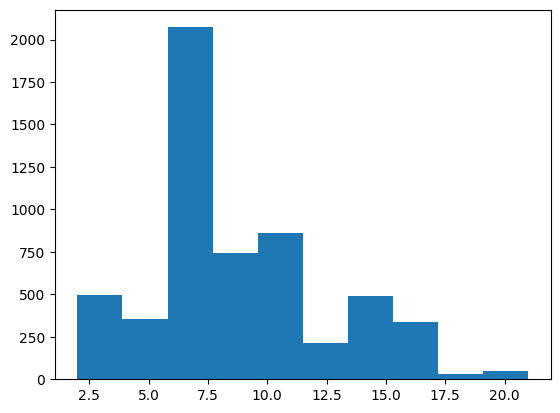

In [ ]:
edjefe = train_v2[(train_v2['edjefe']!='yes') &(train_v2['edjefe']!='no')]['edjefe'].astype(float)
plt.hist(edjefe)
e_median = edjefe.median()
train_v2.edjefe = train_v2.edjefe.map(lambda x : e_median if x=="yes" else 0 if x=="no" else x ).astype(float)


7.0

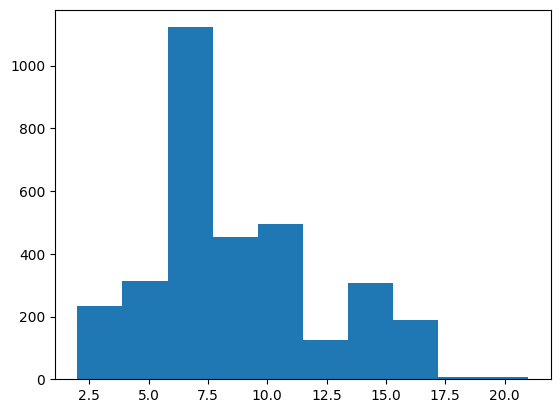

In [ ]:
edjefa = train_v2[(train_v2['edjefa']!='yes') &(train_v2['edjefa']!='no')]['edjefa'].astype(float)
plt.hist(edjefa)
e_median = edjefa.median()
train_v2.edjefa = train_v2.edjefa.map(lambda x : e_median if x=="yes" else 0 if x=="no" else x ).astype(float)
e_median

### 머신러닝 모델 선정정

In [ ]:
'''소프트맥스 회귀 다중 분류'''
from sklearn.model_selection import train_test_split

feature_columns = list(train_v2.columns.difference(['Id', 'idhogar','Target']))
x = train_v2[feature_columns]
y=train_v2['Target']

'''층화 추출법'''
train_x, test_x, train_y, test_y = train_test_split(x,y, stratify=y, train_size=0.7, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(6673, 137) (2861, 137) (6673,) (2861,)


##### 1. 소프트맥스 회귀 다중 분류류

In [ ]:
'''
lbfgs약자: "제한된 메모리 Broyden–Fletcher–Goldfarb–Shanno 알고리즘". Scikit-Learn Library에서 제공하는 솔버 알고리즘 중 하나입니다.

제한된 메모리라는 용어는 단순히 그래디언트 근사치를 암시적으로 나타내는 몇 개의 벡터만 저장한다는 의미입니다 .

상대적으로 작은 데이터 세트 에서 더 잘 수렴 됩니다 .
'''

In [ ]:
from sklearn.linear_model import LogisticRegression

'''scaler 하기전에는 max_iter을 더 크게 잡아도 안돌아갔었는데 스케일 조정 후 돌아감'''
softm=LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10, max_iter=5000)
softm.fit(train_x_scal, train_y)

LogisticRegression(C=10, max_iter=5000, multi_class='multinomial')

In [ ]:
pred=softm.predict(test_x_scal)

test_cm=confusion_matrix(test_y, pred)
test_acc=accuracy_score(test_y, pred)
test_prc=precision_score(test_y,pred, average="macro" )
test_rcll=recall_score(test_y, pred,  average="macro" )
test_f1=f1_score(test_y,pred,  average="macro" )

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))

[[  77   62    9   84]
 [  33  180   39  216]
 [  26   56   49  229]
 [  18   95   29 1659]]


정확도	68.68%
정밀도	52.63%
재현율	44.34%
F1	46.26%


#### 2. SVM

In [ ]:
'''SVM은 특성의 스케일에 민감하기 때문에 스케일 조정을 해주겠다.'''

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x_scal = scaler.fit_transform(train_x)

In [ ]:
from sklearn.svm import SVC
clf = SVC(C=0.5)
clf.fit(train_x_scal, train_y)

SVC(C=0.5)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
test_x_scal=scaler.transform(test_x)
pred=clf.predict(test_x_scal)
'''macro 평균은 클래스별 f1-점수에 가중치를 주지 않는다. 클래스 크기에 상관없이 모든 클래스를 같은 비중으로 다룬다.

weighted 평균은 클래스별 샘플 수로 가중치를 두어 f1-점수의 평균을 계산한다.

micro 평균은 모든 클래스의 거짓 양성(FP), 거짓 음성(FN), 진짜 양성(TP)의 총 수를 헤아린 다음 정밀도, 재현율, f1-점수를 이 수치로 계산한다.

​

각 샘플을 똑같이 간주한다며 micr, 각 클래스를 동일한 비중으로 고려한다면 macro 평균이 좋다.'''

In [ ]:
test_cm=confusion_matrix(test_y, pred)
test_acc=accuracy_score(test_y, pred)
test_prc=precision_score(test_y,pred, average="macro" )
test_rcll=recall_score(test_y, pred,  average="macro" )
test_f1=f1_score(test_y,pred,  average="macro" )

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))

[[  66   43    0  123]
 [   1  195    0  272]
 [   1   29   40  290]
 [   0   15    0 1786]]


정확도	72.95%
정밀도	84.62%
재현율	45.1%
F1	49.9%


#### 3. k-최근접 이웃(KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(train_x_scal, train_y)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
pred=clf.predict(test_x_scal)

test_cm=confusion_matrix(test_y, pred)
test_acc=accuracy_score(test_y, pred)
test_prc=precision_score(test_y,pred, average="macro" )
test_rcll=recall_score(test_y, pred,  average="macro" )
test_f1=f1_score(test_y,pred,  average="macro" )

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))


#StandardScaler 하지 않았을때 
# [[  35   43   10  144]
#  [  20   96   18  334]
#  [  12   42   21  285]
#  [  22   97   28 1654]]


# 정확도	63.12%
# 정밀도	42.39%
# 재현율	33.32%
# F1	33.9%

[[  62   27   12  131]
 [  12  154   25  277]
 [  12   27   60  261]
 [   2   35   20 1744]]


정확도	70.6%
정밀도	64.35%
재현율	43.28%
F1	47.5%


#### 4. 의사결정나무

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=8)
clf.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=8)

In [ ]:
pred=clf.predict(test_x)

test_cm=confusion_matrix(test_y, pred)
test_acc=accuracy_score(test_y, pred)
test_prc=precision_score(test_y,pred, average="macro" )
test_rcll=recall_score(test_y, pred,  average="macro" )
test_f1=f1_score(test_y,pred,  average="macro" )

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100,2)))
print('정밀도\t{}%'.format(round(test_prc*100,2)))
print('재현율\t{}%'.format(round(test_rcll*100,2)))
print('F1\t{}%'.format(round(test_f1*100,2)))

'''scaler 하기 전 후가 동일함
트리 깊이를 5->8로 옮기니, f1score 기준 40%에서 55% 가까이로 오름름''

[[  82   57    5   88]
 [  28  228   15  197]
 [  12   62   97  189]
 [  24   81   14 1682]]


정확도	73.02%
정밀도	65.37%
재현율	51.1%
F1	54.7%


'scaler 하기 전 후가 동일함'

In [ ]:
importances=clf.feature_importances_
column_nm=pd.DataFrame(x.columns)
feature_importances = pd.concat([column_nm,
                                 pd.DataFrame(importances)],
                                axis=1)
feature_importances.columns=['feature_nm', 'importances']

,feature_nm,importances
0,SQBage,0.001225
1,SQBdependency,0.058150
2,SQBedjefe,0.025026
3,SQBescolari,0.000000
4,SQBhogar_nin,0.093410
...,...,...
132,tipovivi3,0.004274
133,tipovivi4,0.001372
134,tipovivi5,0.006545
135,v14a,0.000000


In [ ]:
feature_importances.sort_values(by='importances' ,ascending=False)[:7]
c

,feature_nm,importances
74,meaneduc,0.213060
4,SQBhogar_nin,0.093410
1,SQBdependency,0.058150
136,v18q,0.035135
106,qmobilephone,0.032492
108,r4h2,0.032142
16,cielorazo,0.027297


In [ ]:
# import matplotlib.pyplot as pyplot
# #from sklearn.metrics import plot_roc_curve, roc_auc_score
# from sklearn.metrics import roc_auc_score
# #plot_roc_curve(clf, x_test, y_test)
# #plt.show()
# R_A_score=roc_auc_score(test_y, clf.predict_proba(test_x)[:,1])
'''roc curve는 binary에서 가능한듯 ValueError: multi_class must be in ('ovo', 'ovr')'''

#### 5. DNN

In [ ]:
'''# 라벨 인코딩
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 원-핫 인코딩
Y_encoded = np_utils.to_categorical(Y)'''

In [ ]:
train_x.shape

(6673, 137)

In [ ]:
train_y.value_counts()


In [ ]:
import numpy
import tensorflow as tf
from tensorflow import keras
# from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils

#seed 설정
seed = 0
numpy.random.seed(seed)
# tf.set_random_seed(seed)


# 라벨 인코딩
# e = LabelEncoder()
# e.fit(Y_obj)
# Y = e.transform(Y_obj)

# 원-핫 인코딩
train_y_v2 = train_y.map({4:3, 3:2, 2:1, 1:0}) # 0,1,2,3,
Y_encoded = np_utils.to_categorical(train_y_v2)


model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(137,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

# model compile9Rrng
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

model.fit(train_x, Y_encoded, epochs=30, batch_size = 5) # 원핫인코딩

print('\n Accuracy: %.4f' % (model.evaluate(train_x, Y_encoded)[1]))

Epoch 1/30
1335/1335 [==============================] - 6s 3ms/step - loss: 3.8267 - accuracy: 0.5504
Epoch 2/30
1335/1335 [==============================] - 4s 3ms/step - loss: 2.3232 - accuracy: 0.5793
Epoch 3/30
1335/1335 [==============================] - 5s 4ms/step - loss: 1.9072 - accuracy: 0.5972
Epoch 4/30
1335/1335 [==============================] - 4s 3ms/step - loss: 1.7622 - accuracy: 0.6087
Epoch 5/30
1335/1335 [==============================] - 4s 3ms/step - loss: 1.6523 - accuracy: 0.6047
Epoch 6/30
1335/1335 [==============================] - 5s 4ms/step - loss: 1.3638 - accuracy: 0.6117
Epoch 7/30
1335/1335 [==============================] - 5s 4ms/step - loss: 1.4096 - accuracy: 0.6159
Epoch 8/30
1335/1335 [==============================] - 4s 3ms/step - loss: 1.2276 - accuracy: 0.6192
Epoch 9/30
1335/1335 [==============================] - 5s 4ms/step - loss: 1.0917 - accuracy: 0.6311
Epoch 10/30
1335/1335 [==============================] - 4s 3ms/step - loss: 1.046